# Gaussian Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Gaussian Naive Bayes with sklearn

## Importing the dataset

The aim is to construct a classifier that predicts whether a user will buy a new SUV given information of his/her Age and Salary.


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
print("Mean \t\t:",   sc.mean_)
print("Variance \t:", sc.var_ )

Mean 		: [3.81266667e+01 6.95833333e+04]
Variance 	: [1.01963956e+02 1.18962306e+09]


In [6]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


# My own Gaussian Naive Bayes algorithm

## Importing the dataset

The aim is to construct a classifier that predicts whether a user will buy a new SUV given information of his/her Age and Salary.


In [9]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Plotting Data

In [11]:
plt.rcParams['figure.figsize']      = (14.0, 12.0)

def plot_data(X, y, title):
    """
        Función necesaría para graficar los datos

        Entradas:

            model : Modelo
            X     : Variable de entrada
            y     : Clase respectivas a cada elemento de X

        Salida:

            Gráfico de los datos X, distinguiendo las clases mediante colores     
    """
    
    fig = plt.figure()
    
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap=plt.cm.Spectral)
    plt.xlim([X[:,0].min()-1, X[:,0].max()+1])
    plt.ylim([X[:,1].min()-1, X[:,1].max()+1])
    #plt.ylabel('x2')
    #plt.xlabel('x1')
    plt.title(title)
    plt.show()

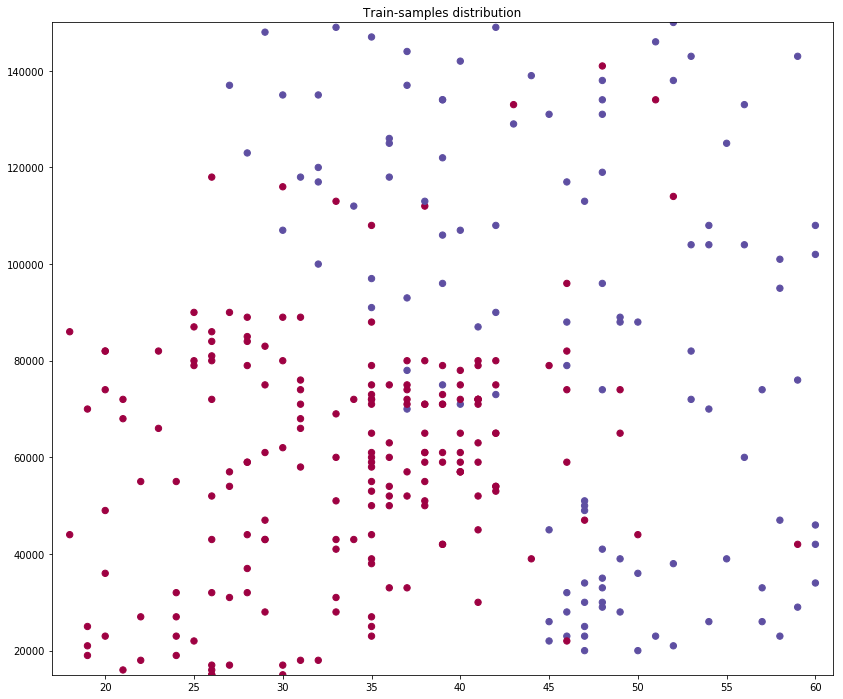

In [12]:
plot_data(X_train, y_train, "Train-samples distribution")

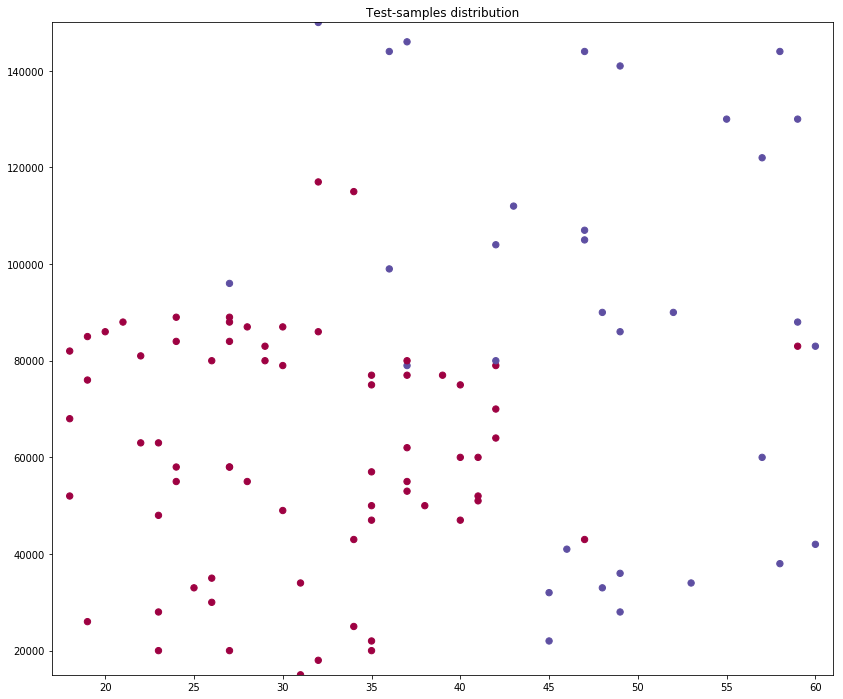

In [13]:
plot_data(X_test, y_test, "Test-samples distribution")

## Feature Scaling

In [14]:
def mean_and_var(X):
    if X.ndim == 1:
        if X.dtype is not np.float64:
            X = X.astype(np.float64)
        for i in range(N):
            mean += X[i,j]
        mean /= N
            
        for i in range(N):
            diff  = X[i,j] - mean
            var  += diff * diff
        var  /= N
            
        return [mean], [var]
    
    else:
        N     = X.shape[0]
        dim   = X.shape[1]
        means = []
        vars  = []
        
        if X.dtype is not np.float64:
            X = X.astype(np.float64)
        
        for j in range(dim):
            mean = 0.0
            var  = 0.0
            
            for i in range(N):
                mean += X[i,j]
            mean /= N
            
            for i in range(N):
                diff  = X[i,j] - mean
                var  += diff * diff
            var  /= N
            
            means.append(mean)
            vars.append(var)
            
        return means, vars
            
def normalize(X, means, vars):
    N     = X.shape[0]
    
    if X.ndim == 1:
        if X.dtype is not np.float64:
            X = X.astype(np.float64)
            
        for i in range(N):
            X[i] = (X[i] - means) / vars ** 0.5
        
        return X
    
    else:
        N     = X.shape[0]
        dim   = X.shape[1]
        
        if X.dtype is not np.float64:
            X = X.astype(np.float64)
        
        for j in range(dim):
            for i in range(N):
                X[i, j] = (X[i,j] - means[j]) / vars[j] ** 0.5
        
        return X

        

In [15]:
means, vars = mean_and_var(X_train)

In [16]:
print("Mean \t\t:",   means)
print("Variance \t:", vars)

Mean 		: [38.126666666666665, 69583.33333333333]
Variance 	: [101.96395555555557, 1189623055.5555546]


In [17]:
X_train = normalize(X_train, means, vars)

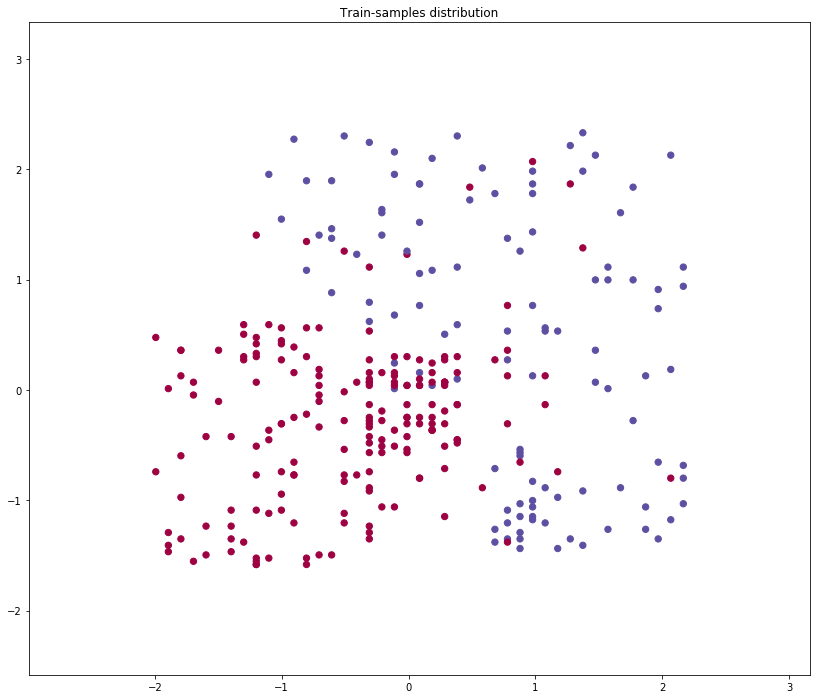

In [18]:
plot_data(X_train, y_train, "Train-samples distribution")

In [19]:
X_test = normalize(X_test, means, vars)

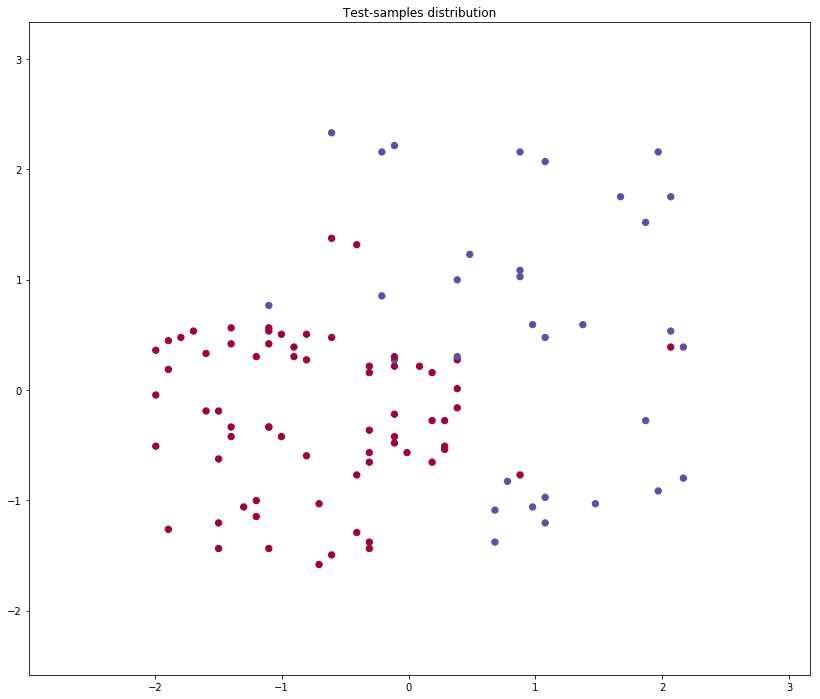

In [20]:
plot_data(X_test, y_test, "Test-samples distribution")

## Gaussian Naive Bayes 

Get mean and variance by class

In [21]:
def getClassAttributes(X,y,n_classes):
    
    N          = X.shape[0]
    dist       = {c:[] for c in range(n_classes)}
    prior_prob = {c:0  for c in range(n_classes)}
    
    for i in range(N):
        dist[y[i]].append(X[i])
        prior_prob[y[i]]+=1
        
    for i in range(n_classes):
        dist[i] = np.array(dist[i], dtype = np.float32)
  
    res  = {}
    for i in range(n_classes):
        means_, vars_ = mean_and_var(dist[i]) 
        res[i] = [(mean, np.sqrt(var)) for mean, var in zip(means_, vars_)]
        prior_prob[i] /= float(N)
        
    return res, prior_prob

In [22]:
class_att, prior_prob = getClassAttributes(X_train, y_train, n_classes = 2)

In [23]:
print("Mean and Stantad Desviation per Class:\n")
for classVal, attributes in class_att.items():
    print('Class: ',classVal, "->", attributes)

Mean and Stantad Desviation per Class:

Class:  0 -> [(-0.457403255079592, 0.7749491420048953), (-0.27263526731323473, 0.7120100676064707)]
Class:  1 -> [(0.7788217642537512, 0.8469664479520634), (0.46421680782359465, 1.2237010522004823)]


### Empirical prior

In [24]:
print("Prior Probability:\n")
print(prior_prob)

Prior Probability:

{0: 0.63, 1: 0.37}


Function for the Gaussian Probability Distribution

In [25]:
def prob(X, mean, std):
    exp_comp = -(X - mean)**2 /  (2 * std ** 2)
    cnt_comp = 1 / (std * np.sqrt(2 * np.pi))
    return cnt_comp * np.exp(exp_comp)

In [26]:
def classProb(input_var, class_mean_var, prior):
    res = {}
    for classVal, class_Att in class_mean_var.items():
        prob_res = 1
        for j in range(len(class_Att)):
            mean_j, stddev_j =  class_Att[j]
            prob_j_c  = prob(input_var[j], mean_j, stddev_j)
            prob_res *= prob_j_c
        res[classVal] = prob_res*prior[classVal]
    return res

In [27]:
classProb([-0.457, -0.27], class_att, prior_prob)

{0: 0.18171815194550667, 1: 0.016368082684293014}

## Prediction function

In [28]:
def predictClass(input_var, class_mean_var, prior):
    class_prob = classProb(input_var, class_mean_var, prior)
    max_prob   = 0
    res        = None
    for classVal, class_p in class_prob.items():
        if class_p > max_prob:
            res      = classVal
            max_prob = class_p
            
    return res

In [29]:
predictClass([-0.457, -0.27], class_att, prior_prob)

0

In [30]:
def predict(input_,  class_mean_var, prior):
    N      = input_.shape[0]
    result = np.zeros(shape = (N,))
    
    for i in range(N):
        result[i] = predictClass(input_[i], class_mean_var,prior)
        
    return result

## Accucary

In [31]:
def accuracy(y_pred, y):
    count = 0
    for i in range(y_pred.size):
        if int(y_pred[i]) == y[i]:
            count += 1

    return count/float(y_pred.size)

We have an accuracy of 88,3% on the training set

In [32]:
y_train_pred = predict(X_train, class_att, prior_prob)
print('Train Accuracy = {:3.2f}%'.format(accuracy(y_train_pred, y_train)*100))

Train Accuracy = 88.33%


And 90% of accuracy for the test data

In [33]:
y_test_pred = predict(X_test, class_att, prior_prob)
print('Train Accuracy = {:3.2f}%'.format(accuracy(y_test_pred, y_test)*100))

Train Accuracy = 90.00%


## Making the Confusion Matrix

We have the same confusion matrix of sklearn algorithm

In [34]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[65  3]
 [ 7 25]]


## Visualising the Training set results

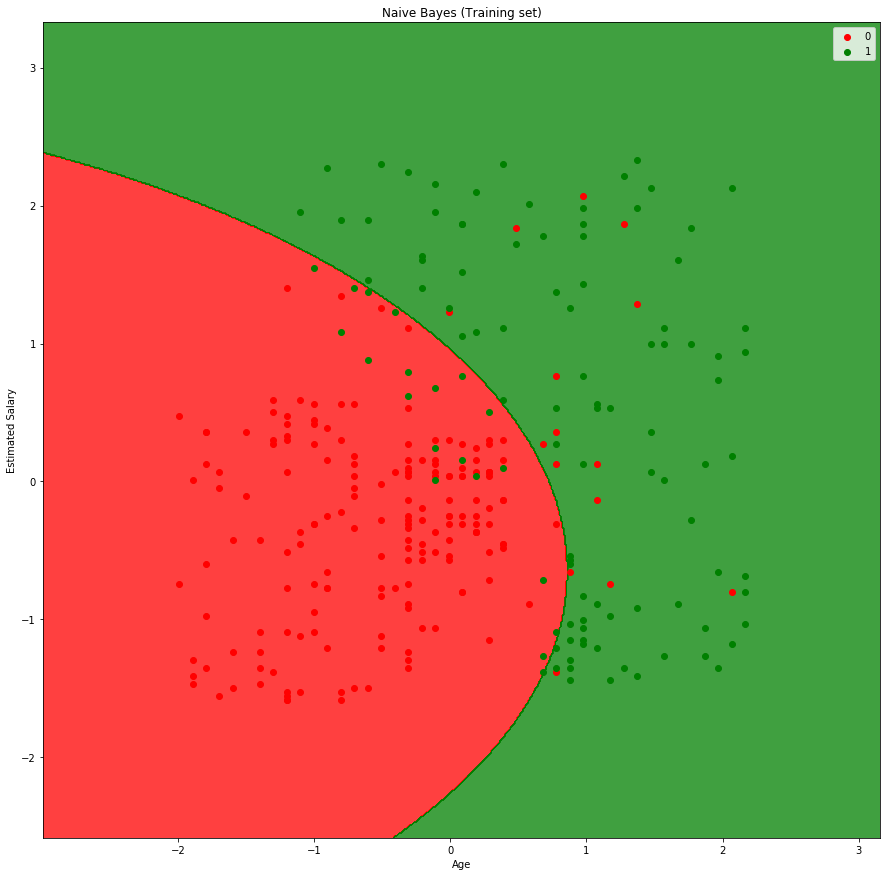

In [35]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

######################################################################
# Code
prediction = predict(np.array([X1.ravel(), X2.ravel()]).T, class_att, prior_prob)
plt.contourf(X1, X2, prediction.reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
######################################################################

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

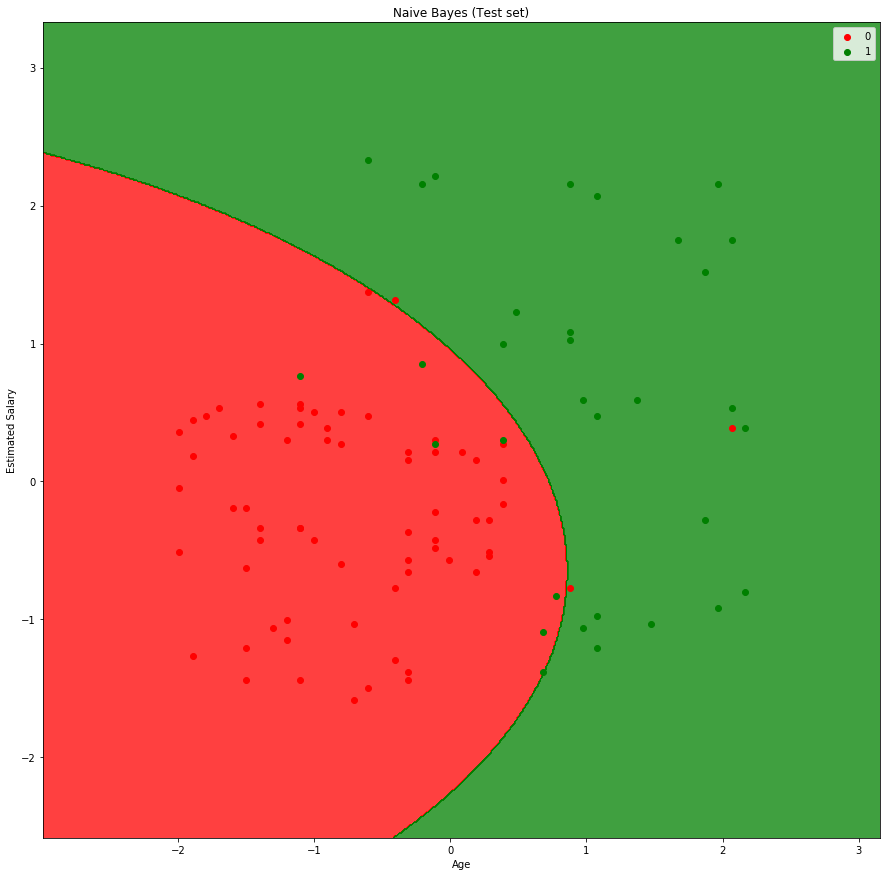

In [36]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

######################################################################
# Code
prediction = predict(np.array([X1.ravel(), X2.ravel()]).T, class_att, prior_prob)
plt.contourf(X1, X2, prediction.reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
######################################################################

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Excercise: Try your own Gaussian Naive Bayes algorithm 

- Hint: compute the mean and standard deviation for each class value and variable|class

- Use a Gaussian function to estimate the probability of a specific attribute value. To do so, you can use the mean and standard deviation computed for that attribute from the training data.

- You should obtain the same confusion matrix of sklearn algorithm
